<a href="https://colab.research.google.com/github/nuo24/web_crawler/blob/main/Copy_of_INFO212_Week3_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO 212: Data Science Programming 1
___

### Week 3: Numpy: Arrays and Vectorized Computation
___

### Mon., Wed., Friday, April 12, 14, 16, 2021
---

**Question:**
- What efficient capabilities does Python provide for data manipulation and scientific computing?

**Objectives:**
- Apply fast vectorized array operations for data munging and cleaning, subsetting and filtering, transformation, and any other kinds of computations
- Compute descriptive statistics and aggregating/summarizing data using Numpy's methods
- Merge and join together heterogeneous datasets
- Express conditional logic as array expressions instead of loops with if-elif-else branches
- Group and aggregate numpy data.


## Motivation Scenario
#### Imagine you work in a health services center. The Center recently started to monitor the daily body temperatures of their patients. The temperature data is stored as a spreadsheet/tabular format/matrix/2-D array:
- each row records a patient's temperatures
- each column corresponds to a day

#### You want to quickly answer the following questions using Python:
- daily mean
- patient mean
- daily max/min
- patient max/min


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import the following libraries for each data analysis task.
- pandas as pd
- numpy as np
- matplotlib.pylot as plt

Make the matplotlib inline for the figures to show up in the notebook

The following statements to set up some preferences.

In [ ]:
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

NumPy, short for Numerical Python, is one of the most important foundational packages
for numerical computing in Python. Most computational packages providing
scientific functionality use NumPy’s array objects as the lingua franca for data
exchange.
Here are some of the things you’ll find in NumPy:
* ndarray, an efficient multidimensional array providing fast array-oriented arithmetic operations and flexible broadcasting capabilities.
* Mathematical functions for fast operations on entire arrays of data without having to write loops.
* Tools for reading/writing array data to disk and working with memory-mapped files.
* Linear algebra, random number generation, and Fourier transform capabilities.
* A C API for connecting NumPy with libraries written in C, C++, or FORTRAN.

Efficiency of Vectorizied numpy computation

In [ ]:
my_arr = np.arange(1000000)
my_list = list(range(1000000))

```
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]
```

In [ ]:
%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]

In [ ]:
0.0909/2.16

## Numpy narray Computation

How to load data from disk to numpy arrays?

```np.loadtxt()```

```
data = np.loadtxt('datasets/inflammation-data/inflammation-01.csv', delimiter = ",")
```

In [ ]:
data = np.loadtxt('datasets/inflammation-data/inflammation-01.csv', delimiter = ",")

OSError: ignored

```
?np.loadtxt```

Assign the array to a variable called 'data' and print it.

What type of things does data refer to?
```
print(type(data))
```

The output tells us that data currently refers to an N-dimensional array, the functionality for which is provided by the NumPy library. These data correspond to arthritis patients’ inflammation. The rows are the individual patients, and the columns are their daily inflammation measurements.

What type of data contained in the numpy array?

```
data.dtype
```

What is the size of the array? How many rows and columns?

```
data.shape
```

What is the first value in the array? the value at row 0 and column 0?

```
print("The first value in the array: ", data[0,0])
```

What is the middle value in the array? value at row 30 and column 20.

```
print('The middle value in the array: ', data[30, 20])
```

$m\times n$ array's index starts from 0, 0 to m, n.
![](https://i.imgur.com/2zwzXCw.png)

How to select part of the data? For example, the inflammation of first 10 days for patients 3-6?

```
data[3:6, 0:10]
```

## Chenage to exercise
**How to select** rows 0 through 6 and columns 39 through to the end of the array?

```
data[:3, 36:]
```

Arrays also know how to perform common mathematical operations on their values. The simplest operations with data are arithmetic: addition, subtraction, multiplication, and division. When you do such operations on arrays, the operation is done element-by-element.

How to double the inflammation values for all the patients and for all days?

```
doubledata = data * 2
print(doubledata[:3, 36:])
print("--"*10)
print(data[:3, 36:])
```

```
tripledata = doubledata + data
print(tripledata[:3, 36:])
```

Often, we want to do more than add, subtract, multiply, and divide array elements. NumPy knows how to do more complex operations, too. If we want to find the average inflammation for all patients on all days, for example, we can ask NumPy to compute data’s mean value.

```
np.mean(data)
```

When analyzing data, though, we often want to look at variations in statistical values, such as the maximum inflammation per patient or the average inflammation per day. One way to do this is to create a new temporary array of the data we want, then ask it to do the calculation.

```
patient1 = data[1, :]
patient1
```

```
print('The average inflammation for patient 1 is: ', np.mean(patient1))
```

What if we need the maximum inflammation for each patient over all days (as in the next diagram on the left) or the average for each day (as in the diagram on the right)? As the diagram below shows, we want to perform the operation across an axis.
![](https://i.imgur.com/T8tMG7M.png)

How to calculate the daily average inflammation for all the patients?

```
daily_averages = np.mean(data, axis = 0)
daily_averages
```

```
daily_averages.shape
```

How to calculate the average inflammations for all the patients?

```
patient_averages = np.mean(data, axis = 1)
patient_averages
```

```
patient_averages.shape
```

The mathematician Richard Hamming once said, “The purpose of computing is insight, not numbers,” and the best way to develop insight is often to visualize data.

We will have an entire lecture for visualization. But we can explore a few features of Python’s matplotlib library here.

How to visualize the inflammation values in a whole picture?

```
plt.imshow(data)
```

Blue pixels in this heat map represent low values, while yellow pixels represent high values. As we can see, inflammation rises and falls over a 40-day period.

How do the average inflammation values look like across days?

```
plt.plot(daily_averages)
```

How do the max inflammation values look like across all days?

```
plt.plot(np.max(data, axis = 0))
```

How do the min inflammation values look like across all days?

In [ ]:
arr = [4,5,6,7], [3,9,2,6]



NameError: ignored

```
plt.plot(np.min(data, axis = 0))
```

How to put all the figures side by side?

```
fig = plt.figure(figsize=(10, 3))
axes1 = fig.add_subplot(131)
axes2 = fig.add_subplot(132)
axes3 = fig.add_subplot(133)

axes1.plot(np.mean(data, axis = 0))
axes1.set_ylabel("Average")
axes2.plot(np.max(data, axis = 0))
axes2.set_ylabel("Max")
axes3.plot(np.min(data, axis = 0))
axes3.set_ylabel("Min")
# axes2.set_xlim(-1, 50)

plt.tight_layout()
```

NameError: ignored

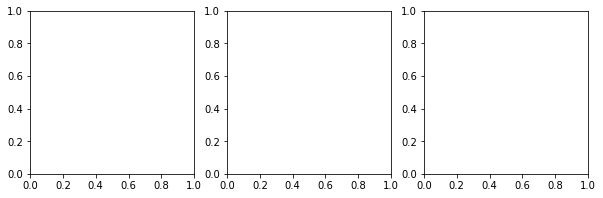

In [ ]:
fig = plt.figure(figsize=(10, 3))
axes1 = fig.add_subplot(1,3,1)
axes2 = fig.add_subplot(1,3,2)
axes3 = fig.add_subplot(1,3,3)

axes1.plot(np.mean(data, axis = 0))
axes1.set_ylabel("Average")
axes2.plot(np.max(data, axis = 0))
axes2.set_ylabel("Max")
axes3.plot(np.min(data, axis = 0))
axes3.set_ylabel("Min")
# axes2.set_xlim(-1, 50)

plt.tight_layout()

This patient data is longitudinal in the sense that each row represents a series of observations relating to one individual. This means that the change in inflammation over time is a meaningful concept.

The numpy.diff() function takes a NumPy array and returns the differences between two successive values along a specified axis.

What is the largest change in inflammation for each patient?

```
np.max(np.diff(data, axis = 1), axis = 1)
```

```
plt.scatter(np.arange(0, 60), np.max(np.diff(data, axis = 1), axis = 1))
plt.grid()
```

## Exercise: load inflammation-01.csv and plot patient average, maximum, minimum side-by-side with different colors: red average, green maximum, and blue minimum.

```
plt.figure(figsize = (12, 9))
plt.scatter(np.arange(0, 60), np.max(np.diff(data, axis = 1), axis = 1), color = 'r')
plt.title('Max Inflammation Change for Patient')
plt.xlabel("patient Index")
plt.ylabel("Max Inflammatin Change")
plt.xticks(np.arange(0, 60, 2))
```

## Data Science Summarization in One Picture

![](https://i.imgur.com/Xsgx4Sc.png)

### Creating ndarrays
The easiest way to create an array is to use the array function. This accepts any
sequence-like object (including other arrays) and produces a new NumPy array containing
the passed data.

```
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1
```

```
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2
```

In addition to np.array, there are a number of other functions for creating new
arrays. As examples, zeros and ones create arrays of 0s or 1s, respectively, with a
given length or shape. empty creates an array without initializing its values to any particular
value. To create a higher dimensional array with these methods, pass a tuple
for the shape.

```
np.zeros(10)
np.zeros((3, 6))
np.empty((2, 3, 2))
```

```
np.arange(15)
```

### Slicing is a View
An important first distinction
from Python’s built-in lists is that array slices are views on the original array.
This means that the data is not copied, and any modifications to the view will be
reflected in the source array.

```
arr = np.arange(10)
```

```
arr_slice = arr[5:8]
arr_slice
```

```
arr_slice[1] = 12345
arr
```

```
arr_slice[:] = 64
arr
```

## Indexing with slices
![](https://i.imgur.com/7yCDlR7.png)

```
arr = np.arange(10)
arr[1:6]
```

In [ ]:
arr = np.arange(10)
arr[:6]

array([0, 1, 2, 3, 4, 5])

```
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[:2]
```

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[:1]

array([[1, 2, 3]])

```
arr2d[:2, 1:]
```

```
arr2d[1, :2]
```

```
arr2d[:2, 2]
```

```
arr2d[:, :1]
```

```
arr2d[:2, 1:]
arr2d
```

### Boolean Indexing
How to get the patients whose average inflammation is great than 7?

```
patient_averages > 7
```

```
data[patient_averages > 7]
```

### Fancy Indexing
Fancy indexing is a term adopted by NumPy to describe indexing using integer arrays.

How to select the patients 6, 4, 12, 7 in this order?

```
data[[6, 4, 12, 7]]
```

```
data[6]
```

```
data[4]
```

```
data[12]
```

```
data[7]
```

## Universal Functions: Fast Element-Wise Array Functions
A universal function, or ufunc, is a function that performs element-wise operations
on data in ndarrays. You can think of them as fast vectorized wrappers for simple
functions that take one or more scalar values and produce one or more scalar results.

```
np.sqrt(data)
```

## Array-Oriented Programming with Arrays
Using NumPy arrays enables you to express many kinds of data processing tasks as
concise array expressions that might otherwise require writing loops. This practice of
replacing explicit loops with array expressions is commonly referred to as vectorization.
In general, vectorized array operations will often be one or two (or more) orders
of magnitude faster than their pure Python equivalents, with the biggest impact in
any kind of numerical computations.

As a simple example, suppose we wished to evaluate the function $d= \sqrt{x^2 + y^2}$
across a regular grid of values. The np.meshgrid function takes two 1D arrays and
produces two 2D matrices corresponding to all pairs of $(x, y)$ in the two arrays:

```
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points)
xs
```

```
np.meshgrid?
```

```
z = np.sqrt(xs ** 2 + ys ** 2)
z
```

```
plt.imshow(z); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
```

### Expressing Conditional Logic as Array Operations
How to replace all the inflammation values greater than 10 to 10?

```
data[0]
```

```
smoothed_data = np.where(data > 10, 10, data)
```

```
smoothed_data[0]
```

### Methods for Boolean Arrays
Boolean values are coerced to 1 (True) and 0 (False) in the preceding methods. Thus,
sum is often used as a means of counting True values in a boolean array.

How many inflammation values greater than 15 for each patient?

```
np.sum(data > 15, axis = 1)
```

### Unique and Other Set Logic
NumPy has some basic set operations for one-dimensional ndarrays. A commonly
used one is np.unique, which returns the sorted unique values in an array.

```
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)
```

## File Input and Output with Arrays
np.save and np.load are the two workhorse functions for efficiently saving and loading
array data on disk. Arrays are saved by default in an uncompressed raw binary
format with file extension .npy.

```
np.save('datasets/inflamation.npy', data)
```

```
data_load = np.load('datasets/inflamation.npy')
```

```
data_load == data
```

## Linear Algebra
Linear algebra, like matrix multiplication, decompositions, determinants, and other
square matrix math, is an important part of any array library. Unlike some languages
like MATLAB, multiplying two two-dimensional arrays with * is an element-wise
product instead of a matrix dot product. Thus, there is a function dot, both an array
method and a function in the numpy namespace, for matrix multiplication.

How similar are the patient 3 and patient 5 in terms of their inflammation values?

```
patient3 = data[3]
patient5 = data[5]
```

```
prod35 = np.dot(patient3, patient5)
mag_3 = np.sqrt(np.dot(patient3, patient3))
mag_5 = np.sqrt(np.dot(patient5, patient5))
```

```
sim = prod35 / (mag_3 * mag_5)
sim
```